# k-Nearest Neighbors (k-NN) Classification Project



## GOAL

The main goal of this project is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of 60 separate sonar frequencies.


## DATA

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).
The "Label" field refers to the object the sonar was beamed at (R for rock, M for mine).

Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)


#### Exploratory Data Analysis

In [1]:
# import libraries for data visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the Data

df = pd.read_csv('../DATA/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [9]:
df["Label"].unique()

array(['R', 'M'], dtype=object)

In [27]:
# check which frequencies are most corelated to the target / label
# to find the most correlated features to the label we hope to predict, we can map the target label to 0 and 1.

df["Target"] = df["Label"].map({"R":0, "M":1})
np.abs(df.corr(numeric_only=True)["Target"]).sort_values()

Freq_57    0.000933
Freq_17    0.003969
Freq_30    0.004219
Freq_16    0.011581
Freq_18    0.014612
             ...   
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, Length: 61, dtype: float64

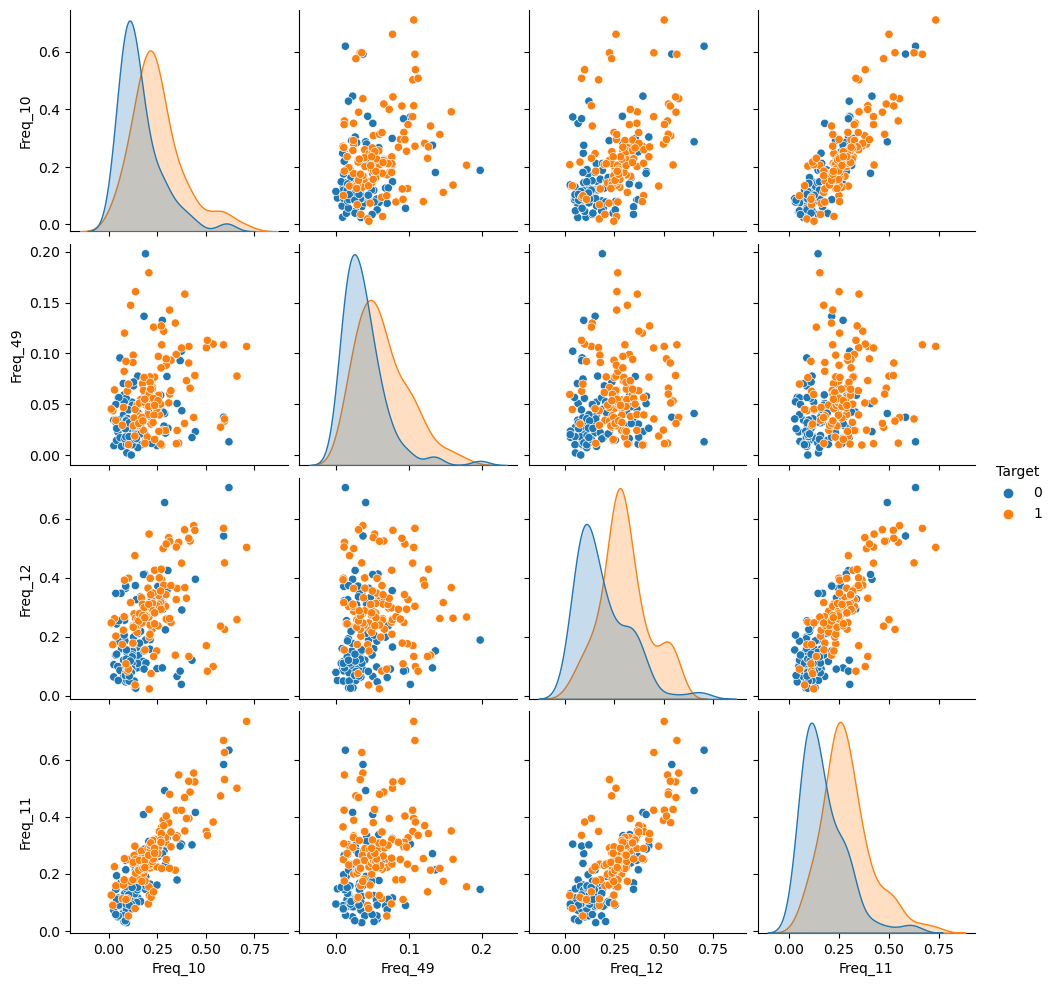

In [34]:
sns.pairplot(data = df[["Freq_10", "Freq_49", "Freq_12", "Freq_11", "Target"]], hue="Target")

<Axes: xlabel='Target', ylabel='count'>

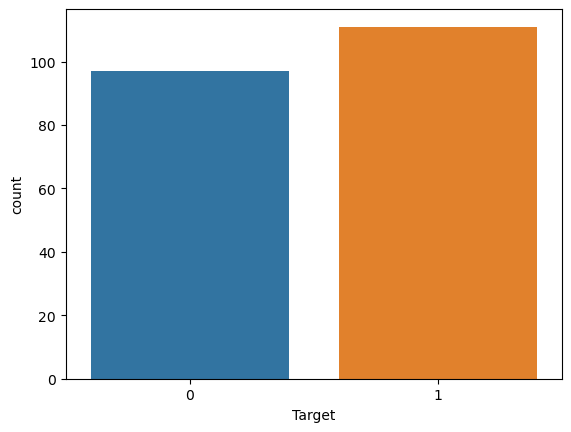

In [36]:
# visualize the balance of the target
sns.countplot(data=df, x="Target")

#### Machine Learning
Train | Test Split and Scaling using scikitlearn

In [31]:
# seperate the data into label and features

X = df.drop(["Target", "Label"], axis=1)
y = df["Label"]

In [32]:
# since we would make use of Cross validation to determine the optimum k parameter value we can save 10% of the data as a hold out test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=404)

In [38]:
# We can use a Pipeline object to set up a workflow of operations such as Scaling Data and Creating Model on Scaled Data

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler',scaler),('knn',knn)]
pipeline = Pipeline(operations)

In [39]:
# Perform a grid-search with the pipeline to test various values of k

from sklearn.model_selection import GridSearchCV

k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy')

In [40]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)

full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [41]:
# get the best performing parameters.

full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

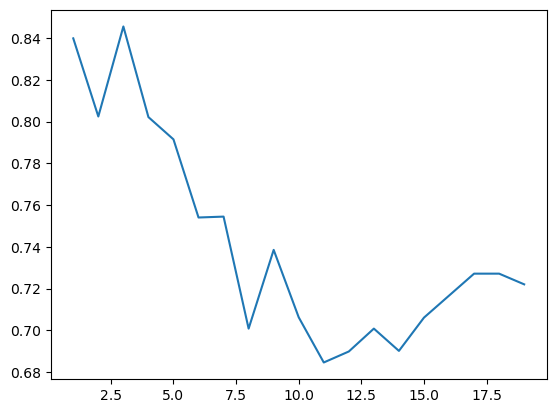

In [45]:
plt.plot(k_values,full_cv_classifier.cv_results_["mean_test_score"])

#### Final Model
We just saw that our GridSearch recommends a K=3 ( alternatively this could be gotten using the Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
operations = [('scaler',scaler),('knn',knn)]

knn_model = Pipeline(operations)
knn_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [55]:
# get predictions

y_pred = knn_model.predict(X_test)

In [51]:
# evaluate the model

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[12,  0],
       [ 1,  8]], dtype=int64)

above we notice 1 false negative in the confusion matrix. in this case, it means our model wrongly classified a mine as a rock. we can further analyze our report with the ROC curve to see if we can improve the model performance or trade off the false negatve. in this case it would be "better" to classify a rock as a mine than classifying a mine as a rock

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      1.00      0.96        12
           R       1.00      0.89      0.94         9

    accuracy                           0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21



In [56]:
# save the model
from joblib import dump
dump(knn_model, 'mine_detection_model.joblib') 

['mine_detection_model.joblib']